Базы данных

Вам дана база данных со словами из хеттского корпуса (в приложении) и расшифровка глосс.

Таблица называется wordforms, имена полей: Lemma, Wordform, Glosses.

Нужно извлечь из неё данные и на них построить новую многотабличную реляционную базу с тремя таблицами: слова (id, Lemma, Wordform, Glosses), глоссы (id, обозначение, расшифровка) и слова-глоссы (id слова, id глоссы). Глоссы из соответствующего поля требуется разбить на отдельные элементы (разбиваются по точке).

Нужно посчитать и визуализировать на графике все глоссы. Нужно подсчитать, каких из этих глосс в базе больше: лучше подсчитать число падежей отдельно, число частей речи -- отдельно. Отдельный график для падежей, отдельный график для частей речи и т. д.

In [2]:
import sqlite3

In [3]:
conn = sqlite3.connect('hittite.db')

In [4]:
c = conn.cursor()

In [5]:
c.description

In [6]:
data = []
for row in c.execute('SELECT * FROM wordforms'):
    data.append(row)

In [7]:
c.execute('CREATE TABLE IF NOT EXISTS words (id integer PRIMARY KEY, Lemma text, Wordform text, Glosses text)')
c.execute('DELETE FROM words')    
for i, row in enumerate(data):
    c.execute('INSERT INTO words VALUES (?,?,?,?)', (i, row[0], row[1], row[2]))
conn.commit()

In [8]:
with open("Glossing_rules.txt", "rb") as f:
    content = f.readlines()

In [9]:
dict_glosses = {}
for line in content:
    line_ = line.decode('utf8').strip().split(' — ')
    dict_glosses[line_[0]] = line_[1]

In [10]:
dict_glosses

{'ADJ': 'adjective',
 'ADV': 'adverb',
 'AUX': 'auxiliary',
 'COMP': 'complementizer',
 'CONJ': 'conjunction',
 'CONN': 'connective',
 'DEM': 'demonstrative pronoun',
 'INDEF': 'indefinite pronoun',
 'N': 'noun',
 'NEG': 'negative',
 'NUM': 'cardinal',
 'P': 'preposition (postposition)',
 'PART': 'particle',
 'POSS': 'possessive pronoun',
 'PRON': 'pronoun',
 'PRV': 'preverb',
 'PTCP': 'participle',
 'Q': 'question word',
 'REL': 'relative pronoun',
 'V': 'verb'}

In [11]:
c.execute('CREATE TABLE IF NOT EXISTS glosses (id integer PRIMARY KEY, Denotation text, Description text)')
c.execute('DELETE FROM glosses')   
i = 0
for key, val in dict_glosses.items():
    c.execute('INSERT INTO glosses VALUES (?,?,?)', (i, key, val))
    i = i + 1
conn.commit()

In [1]:
def is_gloss_case(gloss_denot):
    if gloss_denot in ['DEM', 'INDEF', 'POSS', 'REL']:
        return True
    else:
        return False

In [14]:
c.execute('CREATE TABLE IF NOT EXISTS words_glosses (id_word integer, id_gloss integer)')
c.execute('DELETE FROM words_glosses')
appearances_pos = {}
appearances_case = {}
for i, row in enumerate(data):
    for gloss_denot in row[2].split('.'):
        if gloss_denot in dict_glosses.keys():  
            command = "SELECT * FROM glosses WHERE DENOTATION = '%D%'".replace('%D%', gloss_denot)
            c.execute('INSERT INTO words_glosses VALUES (?,?)', (i, c.execute(command).fetchone()[0]))
            if is_gloss_case(gloss_denot):
                if gloss_denot in appearances_case.keys():
                    appearances_case[gloss_denot] = appearances_case[gloss_denot] + 1
                else:
                    appearances_case[gloss_denot] = 1
            else:
                if gloss_denot in appearances_pos.keys():
                    appearances_pos[gloss_denot] = appearances_pos[gloss_denot] + 1
                else:
                    appearances_pos[gloss_denot] = 1
conn.commit()

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

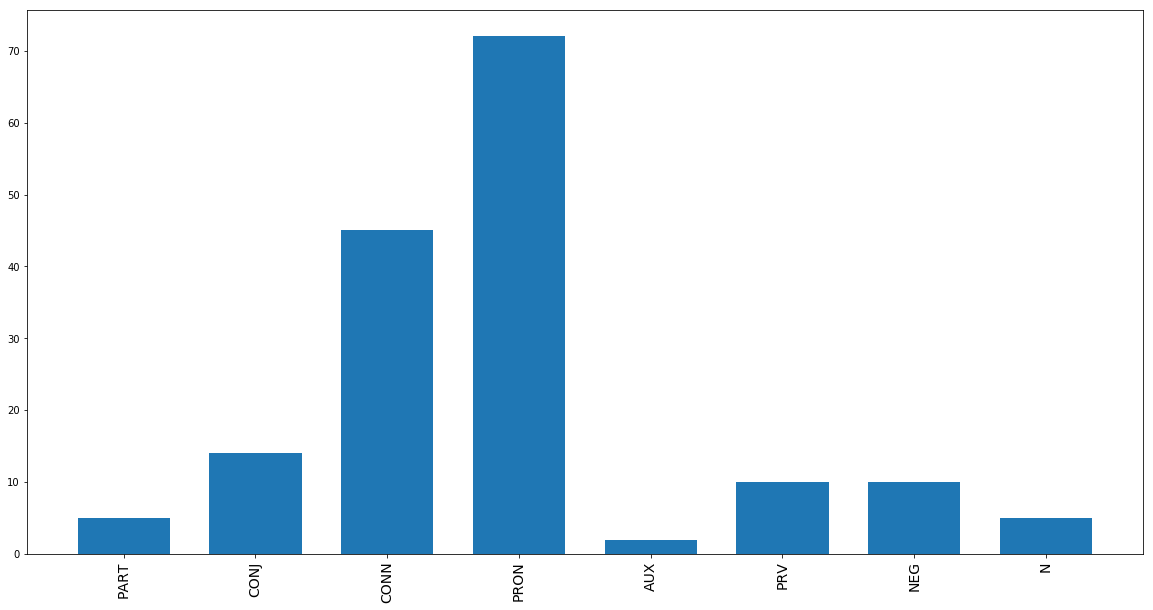

In [16]:
labels, values = zip(*appearances_pos.items())

label_size = 14
plt.rcParams['xtick.labelsize'] = label_size 
indexes = np.arange(len(labels))
width = 0.7
plt.figure(figsize=(20,10))
plt.bar(indexes, values, width, align='center')
plt.xticks(indexes, labels, rotation='vertical')
plt.show()

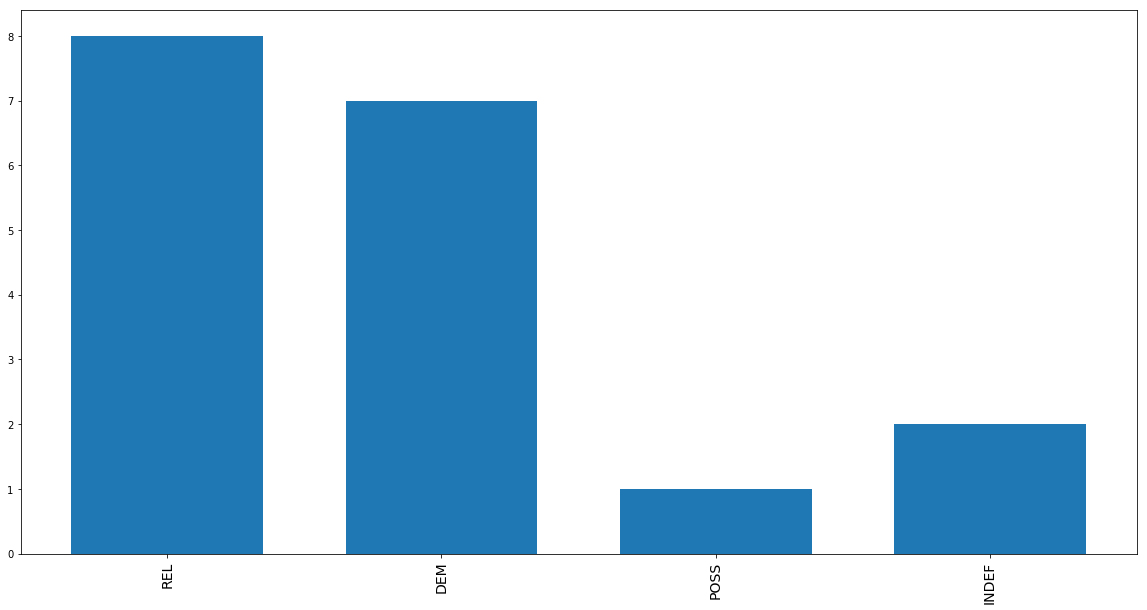

In [17]:
labels, values = zip(*appearances_case.items())

label_size = 14
plt.rcParams['xtick.labelsize'] = label_size 
indexes = np.arange(len(labels))
width = 0.7
plt.figure(figsize=(20,10))
plt.bar(indexes, values, width, align='center')
plt.xticks(indexes, labels, rotation='vertical')
plt.show()